In [1]:
import pandas as pd

In [50]:
# Load the data
df = pd.read_csv('./tactical_response_reports.csv')
df.head()

,trr_id,rd_no,cr_no_obtained,subject_cb_no,event_no,beat,block,street_direction,street_name,location,...,injured,member_in_uniform,subject_gender,subject_race,subject_age,subject_birthyear,subject_armed,subject_injured,subject_alleged_injury,uid
0,7,HK-131349,NaN,15703260.0,401716237,1131,44XX,West,VAN BUREN ST,STREET,...,No,Yes,MALE,BLACK,25,1978,No,No,No,a7e28960-a33d-43bc-8707-d99b0c558e44
1,5554,HK801325,NaN,16031304.0,434511047,1132,39XX,West,FLOURNOY ST,APARTMENT,...,No,Yes,MALE,BLACK,30,1973,No,No,No,a7e28960-a33d-43bc-8707-d99b0c558e44
2,15280,HM348634,NaN,16533991.0,613309864,1121,32XX,West,HURON ST,STREET,...,No,No,MALE,BLACK,32,1973,No,Yes,Yes,a7e28960-a33d-43bc-8707-d99b0c558e44
3,33,HK149368,NaN,15712445.0,402711046,1112,8XX,North,SPRINGFIELD AVE,APARTMENT,...,No,No,MALE,BLACK,37,1967,No,No,No,20add28e-0569-4633-a2fc-1820d25c7171
4,40,HK151340,NaN,15713384.0,402813874,1115,42XX,West,WILCOX ST,ALLEY,...,No,Yes,MALE,BLACK,23,1980,No,No,Yes,827d7e7b-c5be-4d38-ad63-b38ffef268fc


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10579 entries, 0 to 10578
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   trr_id                        10579 non-null  int64  
 1   rd_no                         10568 non-null  object 
 2   cr_no_obtained                2298 non-null   float64
 3   subject_cb_no                 9583 non-null   float64
 4   event_no                      10579 non-null  object 
 5   beat                          10579 non-null  int64  
 6   block                         10579 non-null  object 
 7   street_direction              10567 non-null  object 
 8   street_name                   10579 non-null  object 
 9   location                      10579 non-null  object 
 10  date                          10579 non-null  object 
 11  time                          10574 non-null  object 
 12  indoor_or_outdoor             10452 non-null  object 
 13  l

In [68]:
# Let's load another data set that have the demographics of the officers involved in the incidents
df2 = pd.read_csv('./roster.csv')
df2.head()

,last_name,first_name,middle_initial,gender,race,birthyear,age,status,appointment_date,position_no,...,star7,star8,star9,star10,star11,sworn,unit_id,unit_detail,star,uid
0,HANSEN,GRACIBEL,NaN,F,WHITE HISPANIC,1973.0,44.0,Y,2004-10-25,9161,...,NaN,NaN,NaN,NaN,NaN,Y,13.0,NaN,5512.0,1933d5b3-717a-4e26-8df3-6abfb8ab085b
1,AARON,JEFFERY,M,M,WHITE,1971.0,46.0,Y,2005-09-26,9171,...,NaN,NaN,NaN,NaN,NaN,Y,21.0,NaN,1424.0,1859e58b-84c4-4dbe-8a9b-88b86c703ee6
2,AARON,KARINA,NaN,F,WHITE HISPANIC,1980.0,37.0,Y,2005-09-26,9165,...,NaN,NaN,NaN,NaN,NaN,Y,194.0,NaN,20373.0,6337b0e0-8f89-487e-9374-52c071ee9faf
3,ABATE,DANIEL,P,M,WHITE,1942.0,75.0,N,1970-06-15,9161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,96bd80c2-4032-4095-887b-5443ce89476c
4,ABBATE,ANTHONY,G,M,WHITE,1968.0,48.0,N,1994-12-05,9161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,d91403e8-de57-4276-b276-149c2b3505a8


In [76]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35450 entries, 0 to 35449
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   last_name             35450 non-null  object 
 1   first_name            35450 non-null  object 
 2   middle_initial        29109 non-null  object 
 3   gender                35450 non-null  object 
 4   race                  35115 non-null  object 
 5   birthyear             32451 non-null  float64
 6   age                   35304 non-null  float64
 7   status                31796 non-null  object 
 8   appointment_date      35248 non-null  object 
 9   position_no           34874 non-null  object 
 10  position_description  30857 non-null  object 
 11  unit_no               34030 non-null  float64
 12  unit_description      30840 non-null  object 
 13  resignation_date      19869 non-null  object 
 14  star1                 27742 non-null  float64
 15  star2              

In [99]:
# Let's see all the rows where the feature injured is Yes and the subject is not armed
df[(df['subject_injured'] == 'Yes') & (df['subject_armed'] == 'No')].value_counts('subject_race')

subject_race
BLACK                      1826
WHITE HISPANIC              452
WHITE                       270
ASIAN/PACIFIC ISLANDER       23
BLACK HISPANIC               17
UNKNOWN                       6
AMER IND/ALASKAN NATIVE       2
dtype: int64

In [70]:
# Let's see all the rows where the feature injured is True
injured = df[(df['subject_injured'] == 'Yes') & (df['subject_armed'] == 'No')]
# Now let's merga the df2 with the injured df
comb = pd.merge(injured, df2, on='uid', how='left')
# Let's count the race of the officers involved in the incidents
comb.value_counts('race')

race
WHITE                      1529
WHITE HISPANIC              599
BLACK                       402
ASIAN/PACIFIC ISLANDER       78
AMER IND/ALASKAN NATIVE      21
dtype: int64

Text(0.5, 1.0, 'Age of the white officers involved in the incidents')

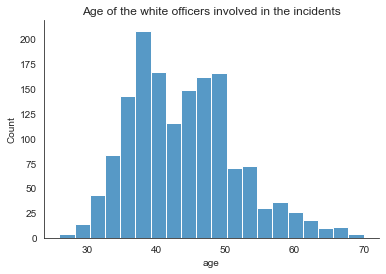

In [116]:
# Let's plot a histogram with seaborns of the age of the officers where the race is white
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('white')
w = comb[(comb['race'] == 'WHITE')]
sns.histplot(data=w, x=w['age'], bins=20)
sns.despine()
plt.title('Age of the white officers involved in the incidents')